# GPT-2 model

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
model = TFAutoModelForSequenceClassification.from_pretrained("michelecafagna26/gpt2-medium-finetuned-sst2-sentiment")
tokenizer = AutoTokenizer.from_pretrained("michelecafagna26/gpt2-medium-finetuned-sst2-sentiment",
                                          truncation = True, max_length = 1024, padding = True)

In [9]:
classifier = pipeline("sentiment-analysis", model = model, tokenizer = tokenizer)

In [13]:
df = pd.read_csv('..\data\IMDB Dataset.csv')

In [14]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [18]:
classifier(['I really liked this movie',
            'This movie was NOT good!',
            ])

[{'label': 'POSITIVE', 'score': 0.9999715089797974},
 {'label': 'NEGATIVE', 'score': 0.9999613761901855}]

In [ ]:
df['sentiment'][df['sentiment'] == 'negative'] = 'NEGATIVE'
df['sentiment'][df['sentiment'] == 'positive'] = 'POSITIVE'

# Här tas bara 13500 rader för att undvika kraschar(som hänt vid "data" > 14000)

In [25]:
df = df[:13500]
df.head()  

,review,sentiment
0,One of the other reviewers has mentioned that ...,POSITIVE
1,A wonderful little production. <br /><br />The...,POSITIVE
2,I thought this was a wonderful way to spend ti...,POSITIVE
3,Basically there's a family where a little boy ...,NEGATIVE
4,"Petter Mattei's ""Love in the Time of Money"" is...",POSITIVE


In [27]:
df_2 = df.copy()
df_2.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,POSITIVE
1,A wonderful little production. <br /><br />The...,POSITIVE
2,I thought this was a wonderful way to spend ti...,POSITIVE
3,Basically there's a family where a little boy ...,NEGATIVE
4,"Petter Mattei's ""Love in the Time of Money"" is...",POSITIVE


In [28]:
tokenized = tokenizer(df_2['review'].tolist(), truncation=True, padding=True, return_tensors='tf')

In [29]:
print(tokenized.keys())

dict_keys(['input_ids', 'attention_mask'])


In [30]:
df_2['reviews'] = tokenized['input_ids'].numpy().tolist()

In [31]:
df_2.head()

,review,sentiment,reviews
0,One of the other reviewers has mentioned that ...,POSITIVE,"[3198, 286, 262, 584, 30702, 468, 4750, 326, 7..."
1,A wonderful little production. <br /><br />The...,POSITIVE,"[32, 7932, 1310, 3227, 13, 1279, 1671, 1220, 6..."
2,I thought this was a wonderful way to spend ti...,POSITIVE,"[40, 1807, 428, 373, 257, 7932, 835, 284, 4341..."
3,Basically there's a family where a little boy ...,NEGATIVE,"[31524, 612, 338, 257, 1641, 810, 257, 1310, 2..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",POSITIVE,"[25803, 353, 38789, 72, 338, 366, 18565, 287, ..."


In [32]:
df_2['reviews_decoded'] = df_2['reviews'].apply(lambda x: tokenizer.decode(x))

In [33]:
df_2.head()

,review,sentiment,reviews,reviews_decoded
0,One of the other reviewers has mentioned that ...,POSITIVE,"[3198, 286, 262, 584, 30702, 468, 4750, 326, 7...",One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,POSITIVE,"[32, 7932, 1310, 3227, 13, 1279, 1671, 1220, 6...",A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...,POSITIVE,"[40, 1807, 428, 373, 257, 7932, 835, 284, 4341...",I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,NEGATIVE,"[31524, 612, 338, 257, 1641, 810, 257, 1310, 2...",Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",POSITIVE,"[25803, 353, 38789, 72, 338, 366, 18565, 287, ...","Petter Mattei's ""Love in the Time of Money"" is..."


In [34]:
df_2['reviews_decoded'] = df_2['reviews_decoded'].str.replace(r'^\[CLS\]', '', regex=True)
df_2['reviews_decoded'] = df_2['reviews_decoded'].str.replace(r'\[SEP\]$', '', regex=True)
df_2['reviews_decoded'] = df_2['reviews_decoded'].str.replace(r'\[PAD\]', '', regex=True)
df_2['reviews_decoded'] = df_2['reviews_decoded'].str.replace(r'< br / >', '', regex=True)
df_2['reviews_decoded'] = df_2['reviews_decoded'].str.replace(r'<\|endoftext\|>', '', regex=True)

In [35]:
X = df_2['reviews_decoded']
y = df_2['sentiment']

In [36]:
X.head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: reviews_decoded, dtype: object

In [37]:
y.head()

0    POSITIVE
1    POSITIVE
2    POSITIVE
3    NEGATIVE
4    POSITIVE
Name: sentiment, dtype: object

# 70/30 train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [39]:
X_train.head()

7300    This movie's full title is "Waqt: Race Against...
9011    A fairly enjoyable kidnapping caper set in New...
3871    I'm a sucker for a decent superhero movie. (I'...
1219    The long list of "big" names in this flick (in...
7003    After enjoying this show for years, I use to d...
Name: reviews_decoded, dtype: object

In [46]:
y_test.head()

783     NEGATIVE
3980    NEGATIVE
1171    POSITIVE
3450    NEGATIVE
9769    POSITIVE
Name: sentiment, dtype: object

In [40]:
len(X_test), len(X_train)

(4050, 9450)

In [41]:
len(y_test), len(y_train)

(4050, 9450)

In [42]:
y_test.value_counts()

sentiment
NEGATIVE    2043
POSITIVE    2007
Name: count, dtype: int64

In [43]:
y_train.value_counts()

sentiment
NEGATIVE    4768
POSITIVE    4682
Name: count, dtype: int64

In [74]:
results = classifier(X_test.to_list())
print(results)  

In [76]:
results_df = pd.DataFrame(results)
results_df.to_csv(r'..\data\results_GPT-2.csv', index=False)

In [77]:
y_pred = [result['label'] for result in results]

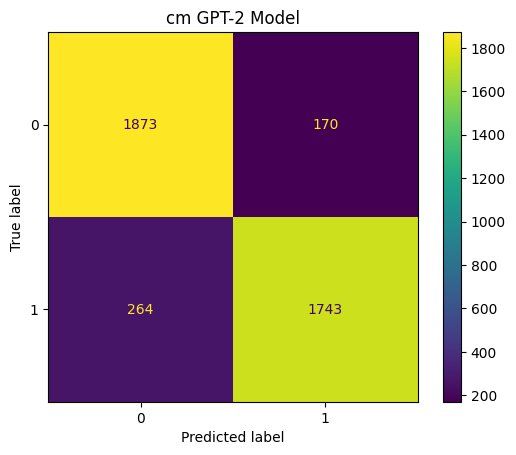

In [78]:
cm = confusion_matrix(y_test, y_pred, labels=['POSITIVE', 'NEGATIVE'])
cm = confusion_matrix(y_test, y_pred)
disp_cm = ConfusionMatrixDisplay(cm)

disp_cm.plot()  
plt.title('cm GPT-2 Model')
plt.show()

In [79]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8928395061728395
